# Geopandas exploration

In [1]:
%load_ext autoreload
%autoreload 2

## Explore data base

In [2]:
import pandas as pd
import sqlalchemy
import geopandas as gpd

from satellitecrops.utils.sql_connector import SQLConnection

In [138]:
# Query all parcelles in the area of pays basque
query =\
"""
SELECT *
FROM parcelles_graphiques
WHERE ST_Within(geom, ST_MakeEnvelope(200000, 6100000, 700000, 6450000, 2154))
LIMIT 100000
"""

conn = SQLConnection()
# row = conn.select(query)[0]

In [139]:
df = gpd.GeoDataFrame.from_postgis(sqlalchemy.text(query), conn.db_conn)

In [140]:
df.shape

(100000, 8)

In [141]:
df.head()

,primaryindex,geom,id_parcel,surf_parc,code_cultu,code_group,culture_d1,culture_d2
0,5917420,"POLYGON ((375577.800 6221779.758, 375569.811 6...",7062086,2.13,PPH,18,,
1,5936050,"POLYGON ((379659.701 6221887.368, 379628.125 6...",6968571,0.22,BOP,17,,
2,5936051,"POLYGON ((379665.212 6221870.783, 379631.002 6...",6968572,0.21,PPH,18,,
3,5936053,"POLYGON ((379661.944 6221949.617, 379642.644 6...",6968573,0.47,PPH,18,,
4,5936506,"POLYGON ((377272.110 6222518.548, 377350.726 6...",6933156,0.57,SPH,17,,


In [73]:
df.head(1).to_crs(4326).to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"primaryindex": 717880, "id_parcel": "1822875", "surf_parc": 5.95, "code_cultu": "PPH", "code_group": "18", "culture_d1": "", "culture_d2": ""}, "geometry": {"type": "Polygon", "coordinates": [[[4.590445340963294, 47.43018938363159], [4.590818345473006, 47.430150317708254], [4.59093982841182, 47.43014593661377], [4.591188596006754, 47.430160430534244], [4.591305586034849, 47.43084483266746], [4.591192662748368, 47.43093437124], [4.5905722955826445, 47.43134725080922], [4.590539582798368, 47.431383997360435], [4.5908068532552955, 47.431682973480655], [4.591269352291816, 47.432040374746414], [4.591454291694437, 47.4321795880449], [4.5916981494043485, 47.43229298277447], [4.592342191623279, 47.43258194946285], [4.592386504262055, 47.43253727166456], [4.592442491612833, 47.43259010631778], [4.592589851282412, 47.43258689825522], [4.592669661399249, 47.432614392619534], [4.59291411487679, 47.4327021494

In [62]:
image_loc = gpd.read_file("../data/test_location_alencon.geojson")
image_loc.head(1).geometry.crs

DriverError: ../data/test_location_alencon.geojson: No such file or directory

In [46]:
image_loc["geometry"] = image_loc.geometry.to_crs("2154")

In [77]:
image_loc.crs

<Projected CRS: EPSG:2154>
Name: RGF93 v1 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica (France métropolitaine including Corsica).
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Projected CRS: EPSG:2154>
Name: RGF93 v1 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica (France métropolitaine including Corsica).
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
import contextily as cx

KeyboardInterrupt: 

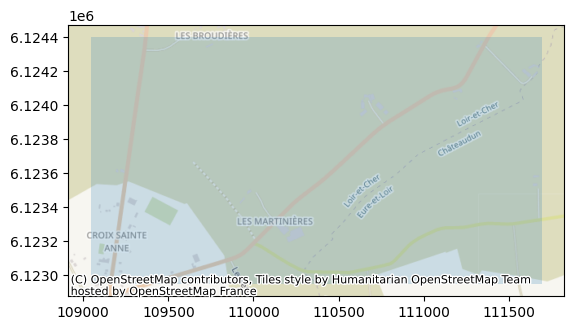

In [84]:
ax = image_loc.to_crs(3857).plot(alpha=0.2)
cx.add_basemap(ax)
df.geom.to_crs(3857).plot(color="red",ax=ax, alpha=1)

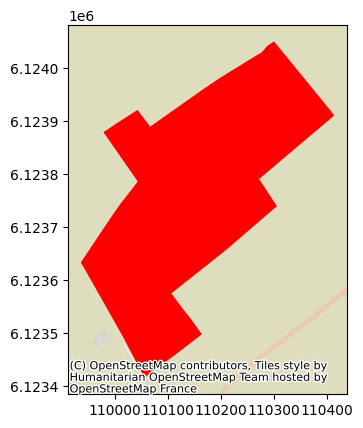

In [12]:
ax = df.head(1).geom.to_crs(3857).plot(color="red", alpha=1)
cx.add_basemap(ax)

# RASTERIO EXPLORATION

In [13]:
import os
import glob
import rasterio
import geopandas as gpd
import numpy as np
import fiona
from rasterio.plot import show
from rasterio.mask import mask
import matplotlib.pyplot as plt

In [14]:
img = rasterio.open("../data/large_img.jp2")

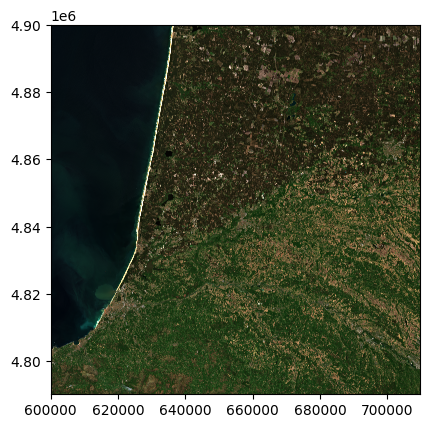

<Axes: >

In [15]:
show(img)

In [17]:
from bs4 import BeautifulSoup

with open("../data/large_img_metadata.xml") as fp:
    soup = BeautifulSoup(fp,'xml')
    coordinates = soup.find('EXT_POS_LIST').text.split()

In [18]:
coordinates

['44.24655093494868',
 '-1.747519127776807',
 '44.22320974043625',
 '-0.37335402628884',
 '43.235600960154144',
 '-0.416191720419125',
 '43.25815531909012',
 '-1.767967299958169',
 '44.24655093494868',
 '-1.747519127776807']

In [108]:
img_coordinates = gpd.read_file("../data/test_location_pays_basque.geojson")
img_coordinates.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

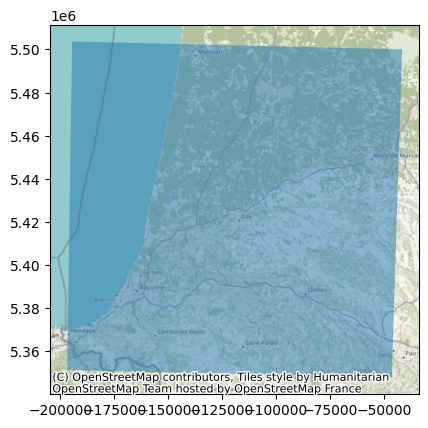

In [112]:
ax = img_coordinates.to_crs(3857).plot(alpha=0.5)
cx.add_basemap(ax)

In [144]:
img_coordinates.to_crs(2154).contains(df.geom).any()

/tmp/ipykernel_121193/1808367553.py:1: UserWarning: The indices of the two GeoSeries are different.
  img_coordinates.to_crs(2154).contains(df.geom).any()


False

In [113]:
df.geom.contains(img_coordinates.to_crs(2154)).any()

/tmp/ipykernel_121193/1387757422.py:1: UserWarning: The indices of the two GeoSeries are different.
  df.geom.contains(img_coordinates.to_crs(2154)).any()


False

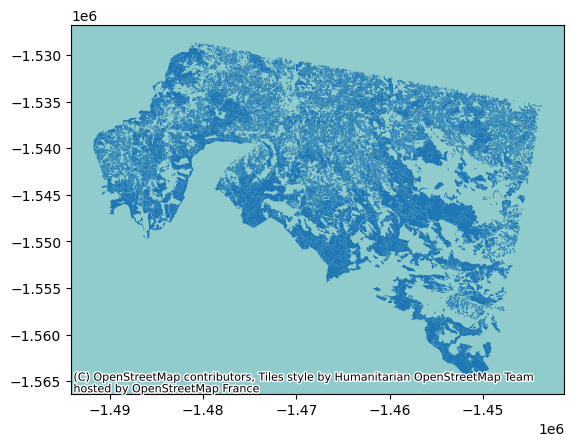

In [119]:
ax = df.geom.to_crs(3854).plot()
cx.add_basemap(ax)

In [129]:
df.geom.head(1).to_crs(3857)

0    POLYGON ((-124030.766 5321731.205, -124073.794...
Name: geom, dtype: geometry

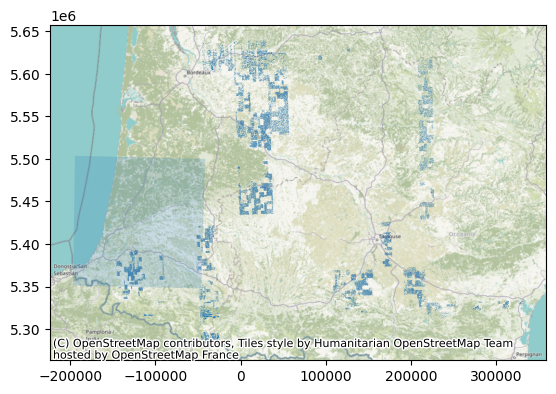

In [142]:
ax = img_coordinates.to_crs(3857).plot(alpha=0.2)
df.geom.to_crs(3857).plot(ax=ax)
cx.add_basemap(ax)

In [160]:
img_coordinates.contains(df.to_crs(4326)).any()

/tmp/ipykernel_121193/2473974944.py:1: UserWarning: The indices of the two GeoSeries are different.
  img_coordinates.contains(df.to_crs(4326)).any()


False

In [156]:
df.geom.to_crs(4326).contains(img_coordinates).any()

/tmp/ipykernel_121193/2566380213.py:1: UserWarning: The indices of the two GeoSeries are different.
  df.geom.to_crs(4326).contains(img_coordinates).any()


False